## 04.P Geospatial Data Problem Set – Summarizing Airborne Snow Observatory Data

__Background:__ For your graduate research, you are using lidar-derived snow water equivalent (SWE) estimates to assimilate into a physics based hydrology model to make streamflow predictions. In thinking through your hypotheses portions of the landscape where SWE data will have the most impact, you are reminded of a figure you saw in a presentation at a recent meeting. The figure shows how the distribution of SWE and land area across a range of elevation interact to control the distribution of water storage in the landscape. The figure looked like the following:

<img src='../img/aso_swe.png' alt='Upper Colorado ASO Analysis' width='750' style='display: block; margin: 0 auto'/>

You already have grids of estimated SWE from the Airborne Snow Observatory (ASO) for 4 separate dates at a 50 m spatial resolution, and a coregistered digital elevation model of the study area – the East River in the Colorado Rocky Mountains.  

__Task:__ Use the skills you've developed and the example notebooks you've examined in this module to create an image like the above. The ASO and coregistered DEM can be found in [this Google Drive folder](https://drive.google.com/drive/u/0/folders/1SkjOWPPJe5N25arCW6qbf2ZJWQsrUAAp). Use any of the four ASO files, which corresponds to 2 different dates in 2018 or 2019, or write your code generically to plot any or all dates. You should only need `rasterio`, `numpy`, and `matplotlib` to create this figure.    

In [ ]:
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
import math as math
from datetime import datetime

#just running through this with 2018 march 31, but this feels like a similar string issue to the first problem set. We know that the prefix for this is going to be
#"ASO_50M_SWE_USCOGE_" with a "Y %m %d" string attached


sample_dates = [20180331, 20180524, 20190407, 20190610]

prefix = 'ASO_50M_SWE_USCOGE_'
path = '/Users/scootty/Desktop/Repositories/sf-GEOS505/Unit04-Geospatial-Data/'
suffix = '.tif'

date_selection = 0
assert isinstance(date_selection, int), "date_selection must be an integer index."
assert 0 <= date_selection < len(sample_dates), f"date_selection must be between 0 and {len(sample_dates)-1}."
date_obj = datetime.strptime(f"{int(sample_dates[date_selection])}", "%Y%m%d").date()


#ASO_180331 = "/Users/scootty/Desktop/Repositories/sf-GEOS505/Unit04-Geospatial-Data/ASO_50M_SWE_USCOGE_20180331.tif"
aso_fname = f'{path}{prefix}{sample_dates[date_selection]}{suffix}'
DEM = rio.open("/Users/scootty/Desktop/Repositories/sf-GEOS505/Unit04-Geospatial-Data/coge_dem_50m.tif")



[[    0.     0.     0. ... -9999. -9999. -9999.]
 [    0.     0.     0. ... -9999. -9999. -9999.]
 [    0.     0.     0. ... -9999. -9999. -9999.]
 ...
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]
 [-9999. -9999. -9999. ... -9999. -9999. -9999.]]
[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -9999.0, 'width': 924, 'height': 1033, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mer

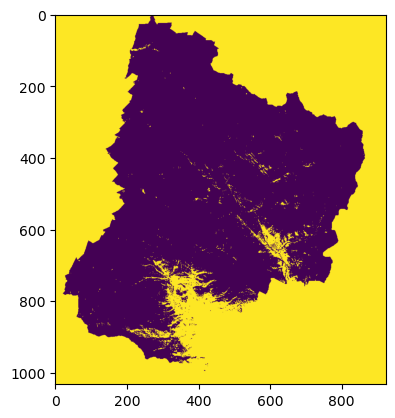

In [100]:
ASO_array = rio.open(aso_fname)
swe = ASO_array.read(1)

swe_mask = np.isin(swe, [-9999, 0])

print(swe)
print(swe_mask)
plt.imshow(swe)
plt.imshow(swe_mask)
print(ASO_array.meta)

#nice not a swe mask! up to 7m of swe for a 50m pixel
print(np.unique(swe))


Pixel area (m²): 2500.0101089102186
Pixel area (km²): 0.0025000101089102185

Elevation Statistics:
Number of columns [east-west]: 924 
Number of rows [north-south]: 1033
Minimum elevation: 2107.98 m
Maximum elevation: 4337.47 m
Mean elevation: 4337.47 m



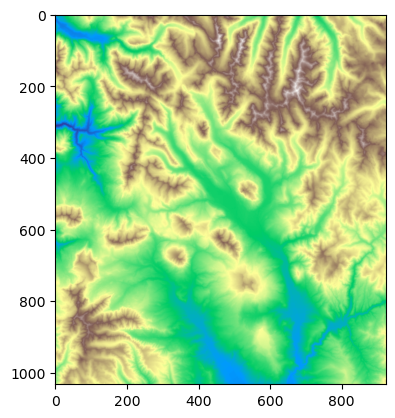

In [101]:
elev_array = DEM.read(1)


pixel_width  = DEM.transform[0]
pixel_height = DEM.transform[4]  # this is negative
pixel_area_m2 = pixel_width * -pixel_height
pixel_area_km2 = pixel_area_m2/1e6
print("Pixel area (m²):", pixel_area_m2)
print("Pixel area (km²):", pixel_area_km2)

zmin = np.nanmin(elev_array)
zmax = np.nanmax(elev_array)
zmean = np.nanmax(elev_array)

zstats = f'''
Elevation Statistics:
Number of columns [east-west]: {elev_array.shape[1]} 
Number of rows [north-south]: {elev_array.shape[0]}
Minimum elevation: {zmin:.{2}f} m
Maximum elevation: {zmax:.{2}f} m
Mean elevation: {zmean:.{2}f} m
'''

print(zstats)

plt.imshow(elev_array, cmap = "terrain")

In [102]:
elev_masked = np.ma.array(elev_array, mask=swe_mask)
swe_masked = np.ma.array(swe, mask=swe_mask)*1000 #converting to mm at this step

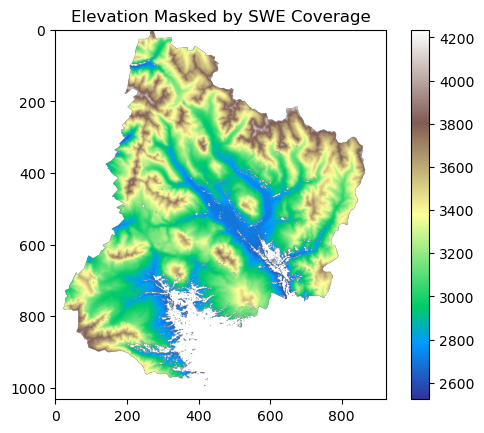

In [103]:
#lets just see if we can look at elev within the swe mask, we know we want 2100 to 4350, 45x50m bins?
plt.imshow(elev_masked, cmap="terrain")
plt.colorbar()
plt.title("Elevation Masked by SWE Coverage")
plt.show()

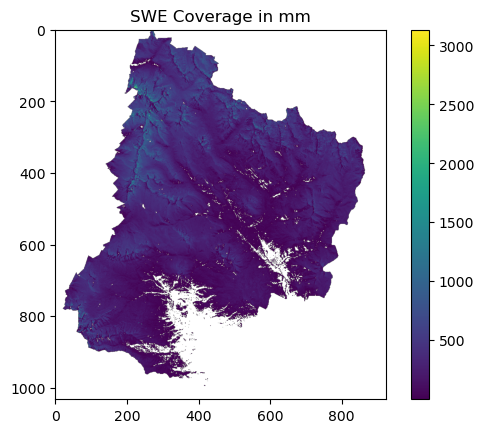

In [104]:
#lets just see if we can look at elev within the swe mask, we know we want 2100 to 4350, 45x50m bins?
plt.imshow(swe_masked, cmap="viridis")
plt.colorbar()
plt.title("SWE Coverage in mm")
plt.show()

Now that I have SWE clipped to elevation, can bin it every 50m for 45 bins (or 46?)

In [105]:
#45 bins of 50 is 

bin_width = 50
num_bins = 45


zmin = elev_masked.min()
zmax = elev_masked.max()

elev_bins = np.linspace(zmin, zmin + num_bins*bin_width, num_bins+1)
z_plot = (elev_bins[:-1] + elev_bins[1:]) / 2 #   + bin_width / 2


In [106]:
print(elev_bins.shape)
print(z_plot.shape)

(46,)
(45,)


In [107]:
print(elev_masked.shape)
print(elev_array)
print(elev_array.shape)

(1033, 924)
[[2495.036  2530.71   2547.77   ... 3075.6199 3092.188  3129.7156]
 [2495.6348 2511.6418 2537.8691 ... 3089.9512 3105.079  3141.3123]
 [2477.9253 2494.5242 2523.0723 ... 3118.3022 3132.356  3155.314 ]
 ...
 [3035.5447 3047.5757 3061.877  ... 3229.3674 3236.9766 3254.6072]
 [3032.926  3052.7595 3059.8423 ... 3223.512  3230.5378 3248.7048]
 [3024.7556 3038.9238 3044.465  ... 3224.7405 3233.366  3246.6362]]
(1033, 924)


In [108]:
#SWE plot
mean_swe_per_band = np.zeros(num_bins)

for i in range(num_bins):
    z_low  = elev_bins[i]
    z_high = elev_bins[i+1]
    in_band = (~swe_masked.mask) & (elev_masked >= z_low) & (elev_masked < z_high)
    band_swe = swe_masked[in_band]
    if band_swe.size == 0:
        mean_swe_per_band[i] = np.nan
    else:
        mean_swe_per_band[i] = np.mean(band_swe)


print(mean_swe_per_band)


[  3.76171995   6.69864756  13.48111059  37.65792456  56.47222435
  69.89812399  86.89339672 113.92271327 144.67881147 169.91600224
 191.787553   212.05597085 237.09715993 266.16217952 295.24396221
 321.70702826 348.28415848 373.78484254 402.63659223 427.68704342
 452.42406254 459.22026878 448.96507509 440.44122188 441.40817595
 460.66271088 454.11577646 443.21821971 433.49852489 469.42181993
 472.06816942 507.84912839 315.41956979 360.37815972 228.27859223
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan]


I have pixel area in km, now I need to count # of pixels in each bin to get area in km

since elev_aray is just the raw elevations for each cell, and the masked is a boolean of if its in our swe boundary or not, I just need to write a loop that checks to see if a given cell is between the floor and ceiling of a given bin.

In [109]:
#some sanity checking
print(elev_masked.shape)
print(elev_array)
print(elev_array.shape)

(1033, 924)
[[2495.036  2530.71   2547.77   ... 3075.6199 3092.188  3129.7156]
 [2495.6348 2511.6418 2537.8691 ... 3089.9512 3105.079  3141.3123]
 [2477.9253 2494.5242 2523.0723 ... 3118.3022 3132.356  3155.314 ]
 ...
 [3035.5447 3047.5757 3061.877  ... 3229.3674 3236.9766 3254.6072]
 [3032.926  3052.7595 3059.8423 ... 3223.512  3230.5378 3248.7048]
 [3024.7556 3038.9238 3044.465  ... 3224.7405 3233.366  3246.6362]]
(1033, 924)


In [110]:
area_per_band_km2 = np.zeros(num_bins)
area_per_band_m2 = np.zeros(num_bins)

for i in range(num_bins):
    z_low  = elev_bins[i]
    z_high = elev_bins[i+1]
    in_band = (~elev_masked.mask) & (elev_array >= z_low) & (elev_array < z_high)
    pixel_count = np.sum(in_band)
    area_km2 = pixel_count * pixel_area_km2

    area_per_band_km2[i] = area_km2


ax = axd["B"]
#fig, ax = plt.subplots(figsize=(10,8))
ax.barh(
    z_plot,
    area_per_band_km2,
    height=bin_width,
    color='skyblue'
    )
    ax.set_ylim([elev_bins[0], elev_bins[-1]])
    ax.set_xlabel('Area (km$^2$)')


fig, ax = plt.subplots(figsize=(10,8))

ax.barh(
    z_plot,
    mean_swe_per_band,
    height=bin_width,
    color='skyblue'
)

ax.set_ylim([elev_bins[0], elev_bins[-1]])
ax.set_xlabel('Cumulative SWE (mm)')
ax.set_ylabel('Elevation (m)')
ax.set_title('Cumulative SWE vs Elevation')

plt.show()

This is close, but is just cumulative swe, not volume of swe per elevation. Now that I have area per band and swe per band, we can calculate swe volume per band

In [111]:
volume_m3 = mean_swe_per_band * area_per_band_km2 /1000 # Mm³ per elevation band

volume_m3


print(volume_m3.shape)
print(mean_swe_per_band.shape)
print(area_per_band_km2.shape)
z_plot.shape

(45,)
(45,)
(45,)


(45,)


ax = ax["C"]

#fig, ax = plt.subplots(figsize=(10,8))

ax.barh(
    z_plot,
    volume_m3,
    height=bin_width,
    color='skyblue'
)

ax.set_ylim([elev_bins[0], elev_bins[-1]])
ax.set_xlabel('Volume of SWE (Mm$^3$)')
ax.set_ylabel('Elevation (m)')
ax.set_title('SWE volume vs Elevation')

plt.show()

Now that I have those two graphs out of the way, I can focus on calculating the statistics for SWE now for the first plot.

In [112]:
z_plot.size

45

In [113]:
mean_swe = np.zeros(z_plot.size)
median_swe = np.zeros(z_plot.size)
std_swe = np.zeros(z_plot.size)

for i in range(z_plot.size):
    z_low  = elev_bins[i]
    z_high = elev_bins[i+1]

    # mask for pixels in this elevation band
    in_band = (~swe_masked.mask) & (elev_masked >= z_low) & (elev_masked < z_high)
    
    band_swe = swe_masked[in_band]

    if band_swe.size == 0:
        mean_swe[i] = np.nan
        median_swe[i] = np.nan
        std_swe[i] = np.nan
        continue

    mean_swe[i]   = np.nanmean(band_swe)
    median_swe[i] = np.nanmedian(band_swe)
    std_swe[i]    = np.nanstd(band_swe)

lower_std = mean_swe - std_swe
lower_std = np.maximum(lower_std, 0) #clip for any values below 0
upper_std = mean_swe + std_swe

In [114]:
print(mean_swe)

[  3.76171995   6.69864756  13.48111059  37.65792456  56.47222435
  69.89812399  86.89339672 113.92271327 144.67881147 169.91600224
 191.787553   212.05597085 237.09715993 266.16217952 295.24396221
 321.70702826 348.28415848 373.78484254 402.63659223 427.68704342
 452.42406254 459.22026878 448.96507509 440.44122188 441.40817595
 460.66271088 454.11577646 443.21821971 433.49852489 469.42181993
 472.06816942 507.84912839 315.41956979 360.37815972 228.27859223
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan]


SWE is too small - its in meters! resolved by rescaling it after masking

In [115]:
ax = axd["A"]

#fig, ax = plt.subplots(figsize=(10,8))

# SWE median line
ax.plot(median_swe, z_plot, color='green', label='Median', linewidth=2)
# Mean SWE line
ax.plot(mean_swe, z_plot, color='blue', label='Mean', linestyle='--')

ax.fill_betweenx(
    z_plot, 
    lower_std, 
    upper_std, 
    color='blue', 
    alpha=0.3, 
    label='±1 SD'
)
# Labels
ax.set_xlabel('SWE (mm)')
ax.set_ylabel('Elevation (m)')
ax.set_title('SWE vs Elevation')
ax.legend()

plt.show()

use the plot code from what nb? to produce 
a|b|c
a|b|c 

subplot mosaic

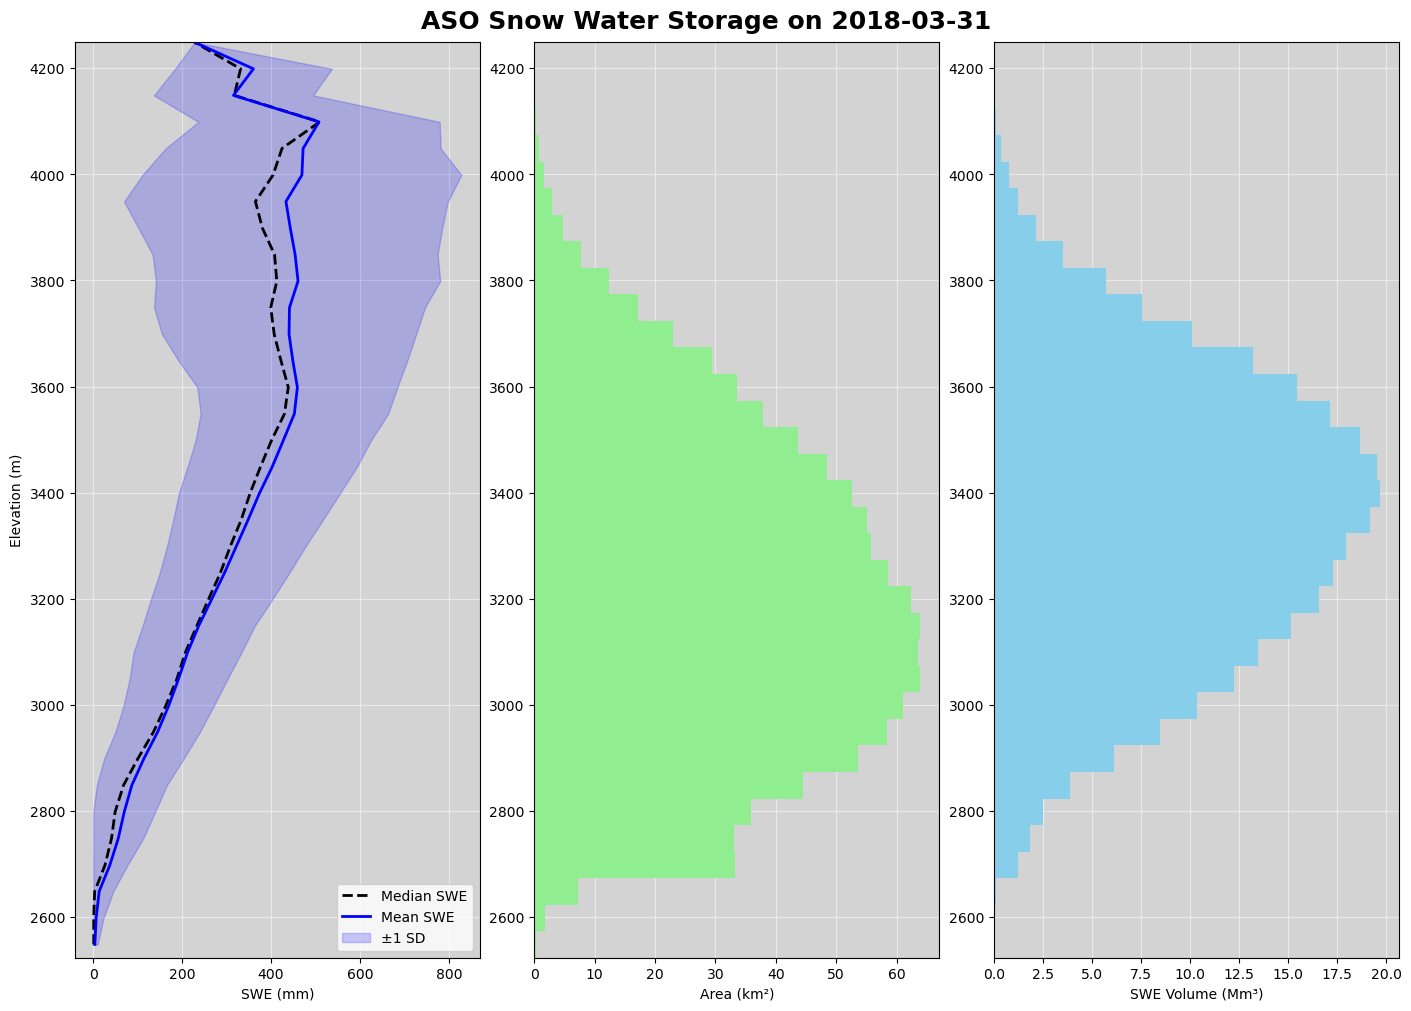

In [116]:
fig = plt.figure(figsize=(14,10), layout="constrained")
fig.suptitle(f"ASO Snow Water Storage on {date_obj}", fontsize=18, fontweight='bold')

axd = fig.subplot_mosaic(
    """
    ABC
    ABC
    """
)

ax = axd["A"]

ax.plot(median_swe, z_plot, color='black', label='Median SWE', linestyle='--',linewidth=2)
ax.plot(mean_swe, z_plot, color='blue',  linewidth=2, label='Mean SWE')
ax.set_facecolor('lightgrey')
ax.fill_betweenx(
    z_plot,
    lower_std,
    upper_std,
    color='blue',
    alpha=0.2,
    label='±1 SD'
)

ax.set_ylim([elev_bins[0], 4250])
ax.set_xlabel('SWE (mm)')
ax.set_ylabel('Elevation (m)')
ax.grid(True, color = "white", alpha = 0.5)
ax.set_axisbelow(True)
#ax.set_title('SWE vs Elevation')
ax.legend(loc = "lower right")

ax = axd["B"]

ax.barh(
    z_plot,
    area_per_band_km2,
    height=bin_width,
    color='lightgreen')
ax.set_facecolor('lightgrey')
ax.set_ylim([elev_bins[0], 4250])
ax.set_xlabel('Area (km²)')
ax.grid(True, color = "white", alpha = 0.5)
ax.set_axisbelow(True)
#ax.set_ylabel('Elevation (m)')
#ax.set_title('Area vs Elevation')

volume_m3 = mean_swe_per_band * area_per_band_km2 / 1000

ax = axd["C"]

ax.barh(
    z_plot,
    volume_m3,
    height=bin_width,
    color='skyblue'
)
ax.set_facecolor('lightgrey')
ax.set_ylim([elev_bins[0], 4250])
ax.set_xlabel('SWE Volume (Mm³)')
ax.grid(True, color = "white", alpha = 0.5)
ax.set_axisbelow(True)
#ax.set_ylabel('Elevation (m)')
#ax.set_title('SWE Volume vs Elevation')

plt.show()
